#  Cluster.ipynb  聚类模型

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as sc
import sklearn.metrics as sm

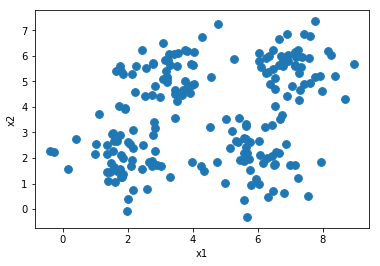

In [7]:
data = pd.read_csv('../data/multiple3.txt', header=None, names=['x1', 'x2'])
# 可视化散点图 看一下数据分布
data.plot.scatter(x='x1', y='x2', s=60)

0.5773232071896658


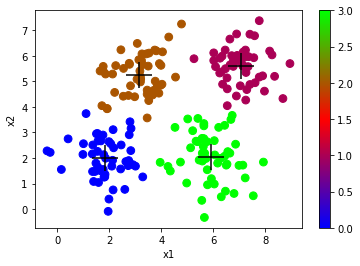

In [70]:
# 训练kmean模型
model = sc.KMeans(n_clusters=4)
model.fit(data)
# 获取每个训练样本输出的类别标签
labels = model.labels_

# 计算轮廓系数
score = sm.silhouette_score(data, labels, sample_size=len(data), metric='euclidean')
print(score)

centers = model.cluster_centers_  # 获取四个聚类中心
ax = data.plot.scatter(x='x1', y='x2', s=60, c=labels, cmap='brg')
centers = pd.DataFrame(centers, columns=['x1', 'x2'])
centers.plot.scatter(x='x1', y='x2', s=700, c='black', marker='+', ax=ax)

In [47]:
# 预测测试样本的类别
test_x = [[8, 1]]
model.predict(test_x)

array([1])

## 均值漂移处理聚类问题

0.5768548615665261


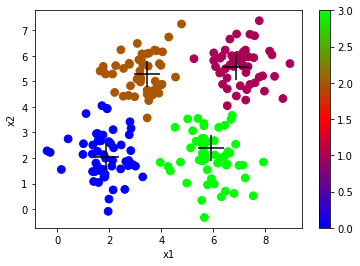

In [77]:
bw = sc.estimate_bandwidth(data, n_samples=len(data), quantile=0.1)
model = sc.MeanShift(bandwidth=bw, bin_seeding=True)
model.fit(data)
# 获取每个训练样本输出的类别标签
labels = model.labels_

# 计算轮廓系数
score = sm.silhouette_score(data, labels, sample_size=len(data), metric='euclidean')
print(score)

centers = model.cluster_centers_  # 获取四个聚类中心
ax = data.plot.scatter(x='x1', y='x2', s=60, c=labels, cmap='brg')
centers = pd.DataFrame(centers, columns=['x1', 'x2'])
centers.plot.scatter(x='x1', y='x2', s=700, c='black', marker='+', ax=ax)

## DBSCAN 算法

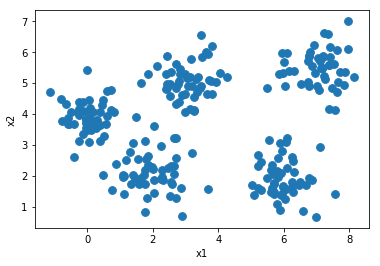

In [78]:
data = pd.read_csv('../data/perf.txt', header=None, names=['x1', 'x2'])
# 可视化散点图 看一下数据分布
data.plot.scatter(x='x1', y='x2', s=60)

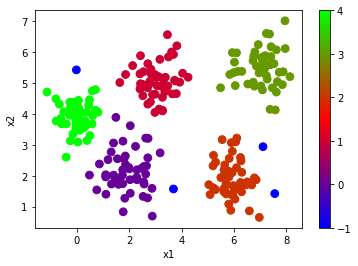

In [87]:
# 训练DBSCAN聚类模型， 基于轮廓系数 优选最优半径
eps = np.arange(0.3, 1.3, 0.1)
models, scores = [], []
for epsilon in eps:
    model = sc.DBSCAN(eps=epsilon, min_samples=5)
    model.fit(data)
    labels = model.labels_
    # 评估轮廓系数
    score = sm.silhouette_score(data, labels, sample_size=len(data), metric='euclidean')
    models.append(model)
    scores.append(score)

# 获取最优得分，最优半径，最优模型
bestind = np.argmax(scores)
best_eps, best_score, best_model = eps[bestind], scores[bestind], models[bestind]
best_eps, best_score, best_model
labels = best_model.labels_
# 可视化
data.plot.scatter(x='x1', y='x2', s=60, c=labels, cmap='brg')

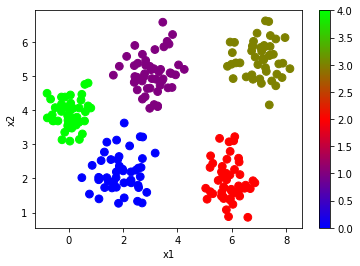

In [88]:
# 如何获取所有的核心样本
core_sample_indices = best_model.core_sample_indices_  # 返回所有核心样本的下标
core_data = data.iloc[core_sample_indices]
core_labels = labels[core_sample_indices]
core_data.plot.scatter(x='x1', y='x2', s=60, c=core_labels, cmap='brg')